## A 2-Layer Neural Network for Regression

In [3]:
%matplotlib inline
import autograd.numpy as np
import autograd.numpy.random as npr
from autograd import grad
import sklearn.metrics
import pylab

## Autograd

Autograd can automatically differentiate native Python and Numpy code. It supports reverse-mode differentiation (a.k.a. backpropagation), which means it can efficiently take gradients of scalar-valued functions with respect to array-valued arguments, as well as forward-mode differentiation, and the two can be composed arbitrarily.

Example use:
```python
 import autograd.numpy as np  # Thinly-wrapped numpy
 from autograd import grad    # The only autograd function you may ever need

 def tanh(x):                 # Define a function
...  y = np.exp(-2.0 * x)
...  return (1.0 - y) / (1.0 + y)
...
 grad_tanh = grad(tanh)       # Obtain its gradient function
 grad_tanh(1.0)               # Evaluate the gradient at x = 1.0
0.41997434161402603
(tanh(1.0001) - tanh(0.9999)) / 0.0002  # Compare to finite differences
0.41997434264973155
```

In [8]:
#Generate Dataset
examples = 1000
features = 100

D = (npr.randn(examples,features), npr.randn(examples))
print('One Row')
print(D[0][0])

One Row
[ 0.17257431 -1.04767377 -0.54143469 -0.82132566  0.64475603  0.1419569
 -0.91432063 -0.30548043  0.0810025  -0.76921707 -0.44540706  0.07045258
 -0.70862966  1.19159356 -0.33961219  0.30830871  1.24501949  0.51356289
 -0.20424774 -0.3429467   0.62065162  1.2798588   0.19450959 -0.4387824
 -0.40988305 -0.14703463 -0.19115092 -0.94947835  0.54487834 -0.02677075
  2.53824151 -2.36767902  0.7680306  -1.20723286 -0.26315795 -0.2123482
 -1.37953266  1.99352876 -0.6336639   0.01899886  0.27700247  0.96243689
 -0.65639311  1.72503871  0.94212423  0.80433369  0.24583995  0.04315721
  1.08297184  0.06655019 -1.13882274  0.61979876 -1.3749148   0.76732816
 -0.36197015 -1.41883552 -0.82912458 -0.13799122  0.04081004 -0.48318681
 -0.31161327 -0.13038294  0.60588458  1.25600827  1.16357838  1.58501833
 -3.07475174 -0.43900115  0.72364583 -0.51213745 -0.24130146 -0.6156544
 -0.31394585 -1.34436895 -0.69787524 -0.61248681  0.5968869   1.16625581
  1.1282038   1.24099492  1.90159973  0.7733221

In [14]:
#Specify the Network
layer1_units = 10
layer2_units = 1
w1 = npr.rand(features,layer1_units)
b1 = npr.rand(layer1_units)
w2 = npr.randn(layer1_units,layer2_units)
b2 = 0.0
theta = (w1,b1,w2,b2)

In [15]:
#define loss function
def squared_loss(y,y_hat):
    return np.dot((y-y_hat),(y-y_hat))

#Output Layer
def binary_cross_entropy(y,y_hat):
    return np.sum(-((y * np.log(y_hat)) + ((1-y) * np.log(1-y_hat))))

#Wrapper Around the neural network
def neural_network(x,theta):
    w1, b1, w2, b2 = theta
    return np.tanh(np.dot((np.tanh(np.dot(x,w1) + b1)), w2) + b2)

#Wrapper around the objective function to be optimised
def objective(theta,idx):
    return squared_loss(D[1][idx],neural_network(D[0][idx],theta))

#Update
def update_theta(theta,delta,alpha):
    w1, b1, w2, b2 = theta
    w1_delta, b1_delta, w2_delta, b2_delta = delta
    w1_new = w1 - alpha * w1_delta
    b1_new = b1 - alpha * b1_delta
    w2_new = w2 - alpha * w2_delta
    b2_new = b2 - alpha * b2_delta
    new_theta = (w1_new,b1_new,w2_new,b2_new)
    return new_theta


In [16]:
#Compute Gradient
grad_objective = grad(objective)

RMSE before training:  0.3771938500280085
RMSE After Training:  0.36252718008861995


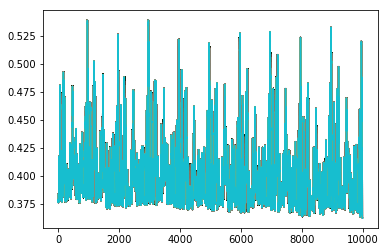

In [22]:
#Train the Neural Network
epochs = 10
print("RMSE before training: ", sklearn.metrics.mean_squared_error(D[1],neural_network(D[0],theta)))
rmse = []
for i in range(0,epochs):
    for j in range(0,examples):
        delta = grad_objective(theta,j)
        theta = update_theta(theta,delta,0.01)
        rmse.append(sklearn.metrics.mean_squared_error(D[1],neural_network(D[0],theta)))
        pylab.plot(rmse)
    
print("RMSE After Training: ", sklearn.metrics.mean_squared_error(D[1],neural_network(D[0],theta)))
pylab.show()